In [63]:
# install.packages("ROCit")
# install.packages("Metrics")

library("randomForest")
library("caret")
library("e1071")
library("ROCit")
library("Metrics")


In [64]:
credito <- read.csv("../data/credit3.csv", sep = ";")

credito$class <- as.factor(credito$class)

head(credito)


,ID,checking_status,credit_history,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1,<0,critical/other existing credit,6,1169,4,4,67,2,1,1
2,2,0<=X<200,existing paid,48,5951,2,2,22,1,1,0
3,3,no checking,critical/other existing credit,12,2096,2,3,49,1,2,1
4,4,<0,existing paid,42,7882,2,4,45,1,2,1
5,5,<0,delayed previously,24,4870,3,4,53,2,2,0
6,6,no checking,existing paid,36,9055,2,4,35,1,2,1


In [65]:
credito <- credito[, -1]

head(credito)


,checking_status,credit_history,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,<0,critical/other existing credit,6,1169,4,4,67,2,1,1
2,0<=X<200,existing paid,48,5951,2,2,22,1,1,0
3,no checking,critical/other existing credit,12,2096,2,3,49,1,2,1
4,<0,existing paid,42,7882,2,4,45,1,2,1
5,<0,delayed previously,24,4870,3,4,53,2,2,0
6,no checking,existing paid,36,9055,2,4,35,1,2,1


In [66]:
# Seed para reprodução dos resultados
set.seed(1234)

# Dividindo a base de dados em treino e teste
amostra <- sample(2, 1000, replace = TRUE, prob = c(0.7, 0.3))

treino <- credito[amostra == 1, ]
teste <- credito[amostra == 2, ]


In [67]:
floresta <- randomForest(class ~ ., data = treino, ntree = 300, importance = TRUE)

floresta



Call:
 randomForest(formula = class ~ ., data = treino, ntree = 300,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 3

        OOB estimate of  error rate: 25.07%
Confusion matrix:
   0   1 class.error
0 68 124   0.6458333
1 51 455   0.1007905

In [68]:
previsao <- predict(floresta, teste)

confusao <- table(teste$class, previsao)

confusao


   previsao
      0   1
  0  46  62
  1  20 174

In [69]:
taxa_acerto <- sum(diag(confusao)) / sum(confusao)

taxa_acerto


[1] 0.7284768

In [70]:
# Curva ROC
resultado <- confusionMatrix(previsao, teste$class, positive = "1", mode = "everything")

resultado


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  46  20
         1  62 174
                                          
               Accuracy : 0.7285          
                 95% CI : (0.6746, 0.7778)
    No Information Rate : 0.6424          
    P-Value [Acc > NIR] : 0.0009054       
                                          
                  Kappa : 0.3533          
                                          
 Mcnemar's Test P-Value : 5.963e-06       
                                          
            Sensitivity : 0.8969          
            Specificity : 0.4259          
         Pos Pred Value : 0.7373          
         Neg Pred Value : 0.6970          
              Precision : 0.7373          
                 Recall : 0.8969          
                     F1 : 0.8093          
             Prevalence : 0.6424          
         Detection Rate : 0.5762          
   Detection Prevalence : 0.7815          
      Balanced Accuracy : 0.66

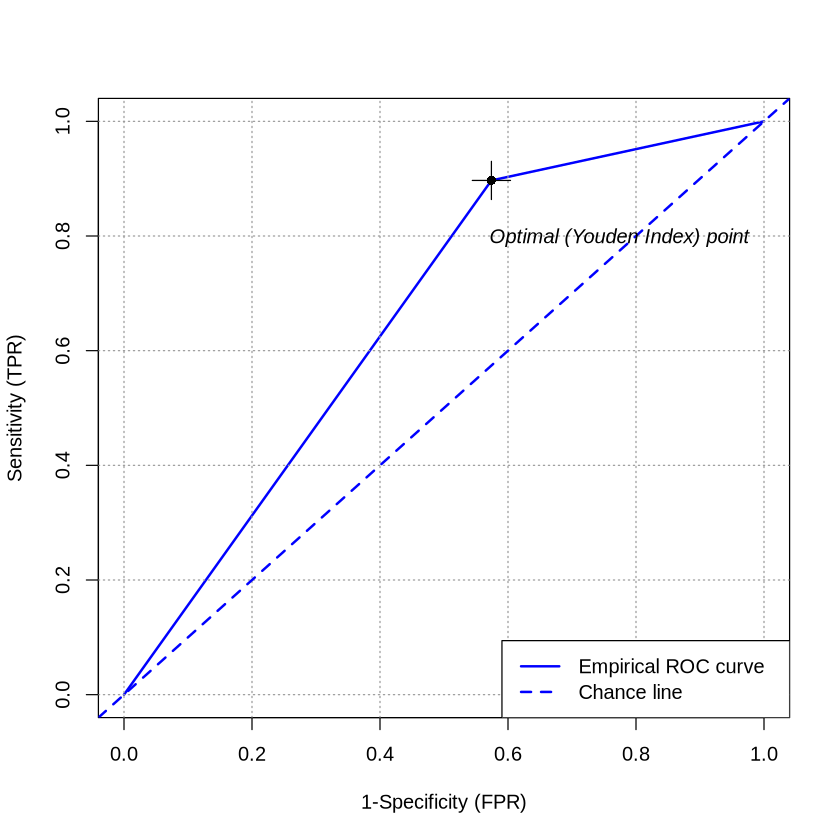

In [71]:
objectroc <- rocit(as.numeric(levels(previsao))[previsao], as.numeric(levels(teste$class))[teste$class])

plot(objectroc, col = "blue")


In [72]:
Metrics::auc(previsao, teste$class)


[1] 0.7171289